In [18]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [19]:
data=pd.read_csv("AQI_Data.csv")

In [20]:
data.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [21]:
data=data.dropna()

In [22]:
data.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [23]:
X=data.iloc[:,:-1] ## independent features
Y=data.iloc[:,-1]  ## dependent features

In [24]:
X.isnull().sum()

T      0
TM     0
Tm     0
SLP    0
H      0
VV     0
V      0
VM     0
dtype: int64

In [25]:
Y.isnull().sum()

0

In [26]:
model=ExtraTreesRegressor()

In [27]:
model.fit(X,Y)

ExtraTreesRegressor()

In [28]:
print(model.feature_importances_)

[0.20115836 0.0881572  0.21350188 0.14404746 0.08687271 0.17456717
 0.05221454 0.03948067]


In [29]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


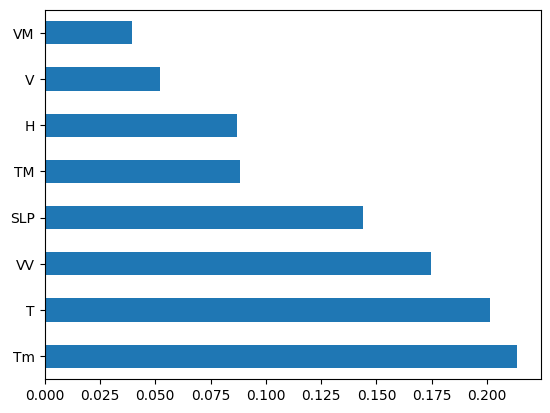

In [30]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

### Linear Regression

C:\Users\kanch\AppData\Local\Temp\ipykernel_16740\3269117342.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y)


<Axes: xlabel='PM 2.5', ylabel='Density'>

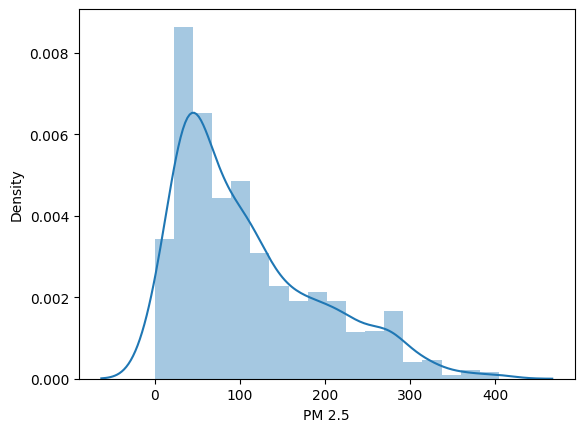

In [31]:
sns.distplot(Y)

### Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=5)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
regressor=LinearRegression()

In [36]:
regressor.fit(X_train,y_train)

LinearRegression()

In [37]:
regressor.coef_

array([ -3.4350451 ,   3.53082245,  -5.43927248,  -0.22975711,
        -0.86591025, -37.80712927,  -1.76482877,   0.39573362])

In [38]:
regressor.intercept_

557.3187295135771

In [39]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.5331022197802728


In [40]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.5264612842731483


### Cross Validation

In [41]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,Y,cv=5)

In [42]:
score

array([0.51616617, 0.43816894, 0.50733957, 0.4861091 , 0.40750087])

### Model Evaluation

In [43]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
T,-3.435045
TM,3.530822
Tm,-5.439272
SLP,-0.229757
H,-0.865910
VV,-37.807129
V,-1.764829
VM,0.395734


#### Interpreting the coefficients:

##### Holding all other features fixed, a 1 unit increase in T is associated with an *decrease of 2.690 in AQI PM2.5 *.
##### Holding all other features fixed, a 1 unit increase in TM is associated with an *increase of 0.46 in AQI PM 2.5 *.

In [44]:
prediction=regressor.predict(X_test)

C:\Users\kanch\AppData\Local\Temp\ipykernel_16740\1520944062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<Axes: xlabel='PM 2.5', ylabel='Density'>

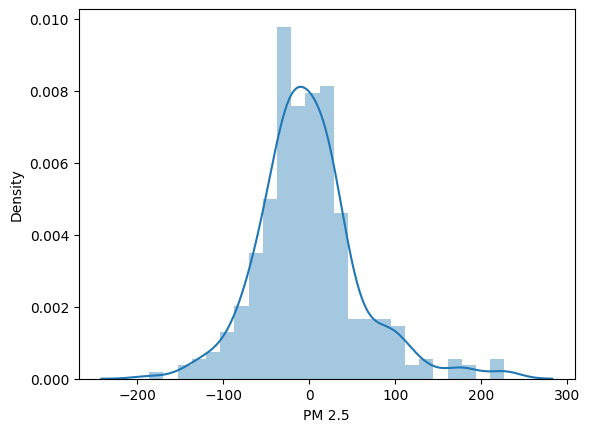

In [45]:
sns.distplot(y_test-prediction)

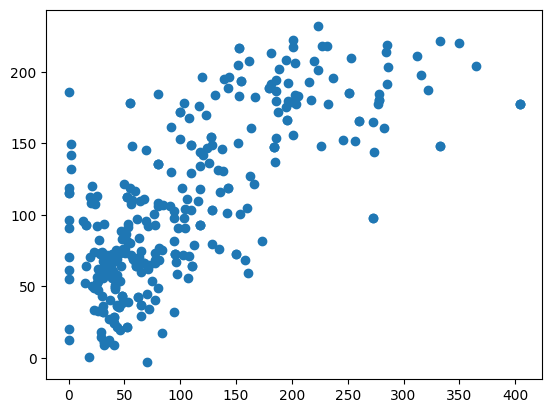

In [46]:
plt.scatter(y_test,prediction)

In [49]:
from sklearn import metrics
import numpy as np

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 42.84725940761079
MSE: 3477.9691996877136
RMSE: 58.97430965842427
